**Random Forest - Regression (Sklearn)**

**Mount Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

**Load Dataset**

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/DSA+ML+DL/Interviw Prep/Gyan/Python/Position_Salaries.csv')
print(dataset.shape)
dataset.head()

(10, 3)


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
print(X[:5])
print(y[:5])

[[1]
 [2]
 [3]
 [4]
 [5]]
[ 45000  50000  60000  80000 110000]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7, 1), (3, 1), (7,), (3,))

In [6]:
# Train
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X, y)

RandomForestRegressor()

In [7]:
# Predicting a new result
y_pred = regressor.predict(y_test.reshape(-1, 1))
print(y_pred)

[852000. 852000. 852000.]


In [8]:
# Accuracies
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error : ", mse)
print("Mean Absolute Error : ", mae)
print("Explained Variance Score : ", evs)
print("R2 Score : ", r2)

Mean Squared Error :  562190666666.6666
Mean Absolute Error :  748666.6666666666
Explained Variance Score :  0.0
R2 Score :  -331.876052631579


<ipython-input-9-f0e51fc4740a>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)


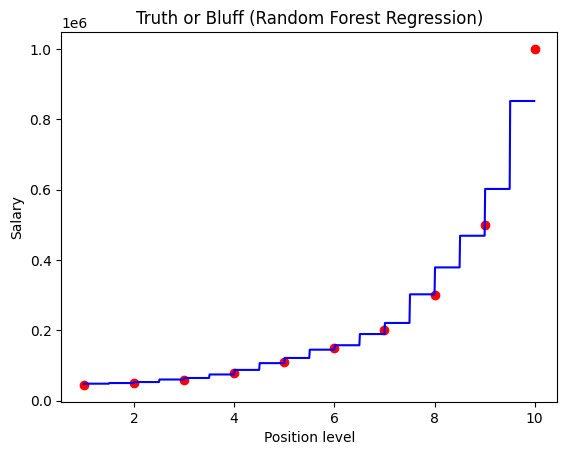

In [9]:
# Visualising the Random Forest Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()